### Fundamentals of Data Analysis 2
***

Problem: In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Nicer plot style.
plt.style.use("ggplot")

# Bigger plots.
plt.rcParams["figure.figsize"] = (18,10)

# I borrowed these straight from one of your lectures as it's the way you like to see graphs
# makes sense I do this for a project you're grading

In [3]:
df = pd.read_csv("powerproduction.csv")

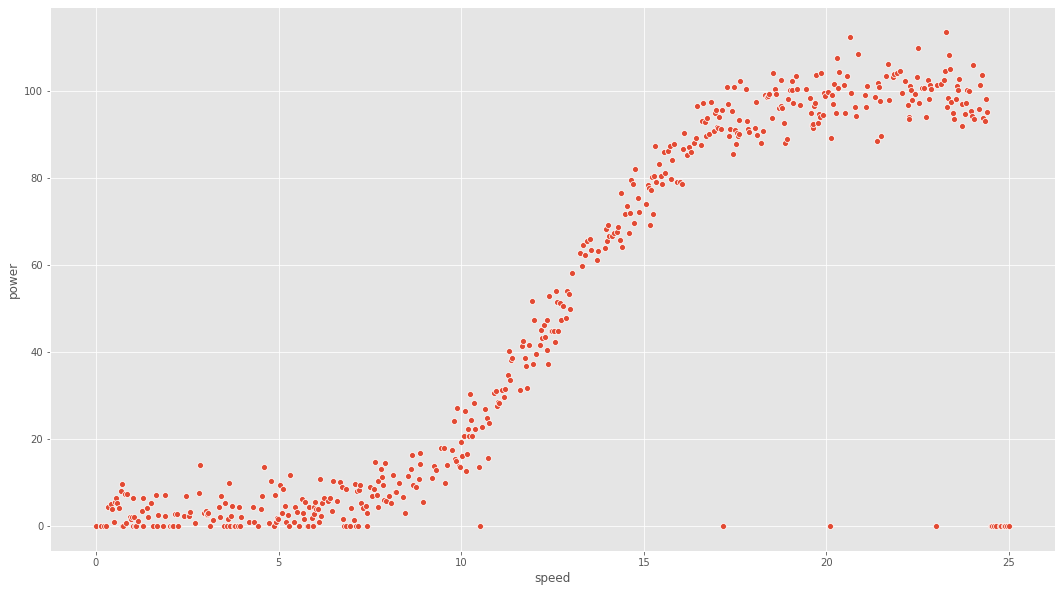

In [4]:
sns.scatterplot(data=df, x="speed", y="power");

# Plot of the data to get a general feel for the information

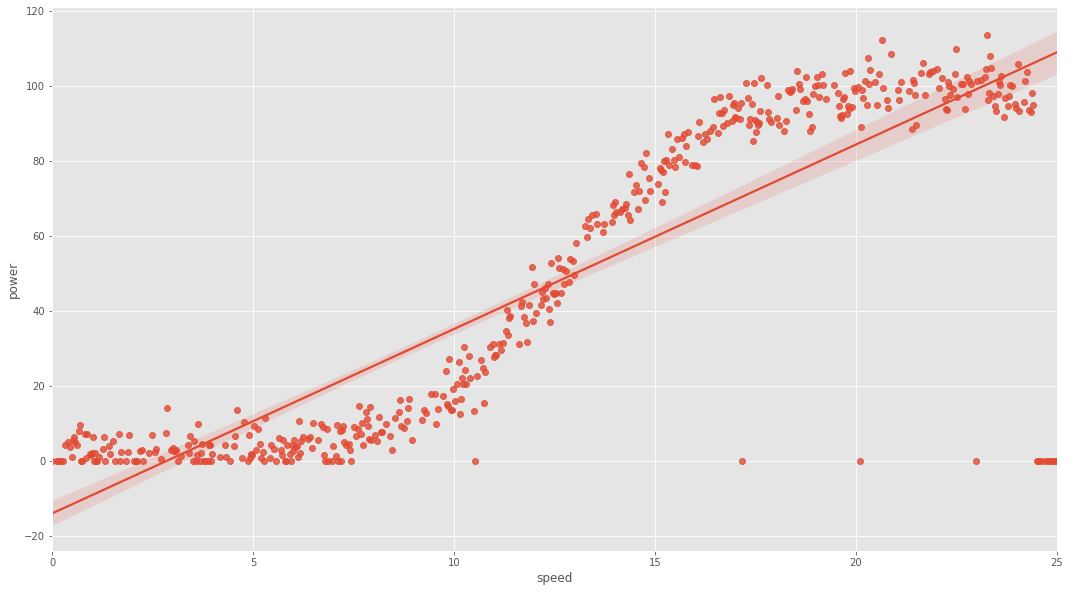

In [5]:
sns.regplot(data=df, x="speed", y="power");

# using regplot we can plot the data and a "line of best fit" is automatically added

# [1]

In [6]:
import sklearn.linear_model as lin

x = df["speed"].to_numpy()
y = df["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r2 = model.score(x, y)

# code to determine the R value of the chart

# [2]

In [7]:
r2

0.7289360258564073

Above I have plotted the data with a linear regression model adding a line of best fit. I have also calculated an R2 value for the data to accurately judge how well the linear regression line describes the data.

The linear regression model is a poor fit for this particular dataset for two reasons; 1, it overestimates the output at given speeds, and 2, it underestimates the power for nearly all the other speeds. The linear regression model is only accurate for short periods throughout the graph, at ~3, 12.5 and 23 "speed". At all other instances it is either over or under estimating the output from the wind turbine.

If the owner of the windfarm were to implement this strategy for supplying and charging for the power he generates then he would be charging too much for the output at low wind speeds and wasting electricity at higher speeds.

The R2 value of line of best fit is 0.72. R2 is described as a statistical measure of how close the datapoints are to the fitted regression line, with 1 being the highest result. The result of 0.72 is still favourable however when you visually inspect the graph it is clear that there are glaring discrepencies between where the line of best fit can be regarded as accurate and when it is wildly inaccurate.

#### Other Methods to Fit a Line to the Data

***

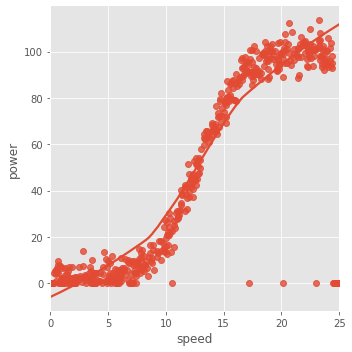

In [8]:
sns.lmplot(x="speed", y="power", data=df, lowess=True);


# lowess or local regression of the dataset carried out by adding the lowess = true function on the lmplot in seaborn

# [4]

Lowess, or Locally Weighted Scatterplot Smoothing, is a regression tool that is used to apply a line to a plot where there are either noisy data values, or where weak relationships occur in the data and throw off a line of best fit. [5]

As we can see in the Lowess graph, the line moves with the data and is locally distributed to properly take into account where the data has been and where it is going, giving a much more accurate fit for a wind farm owner to judge the output of the windfarm for a given day.

#### References

***

[1] https://seaborn.pydata.org/generated/seaborn.regplot.html

[2] https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb

[3] https://statisticsbyjim.com/regression/interpret-r-squared-regression/

[4] https://seaborn.pydata.org/tutorial/regression.html#fitting-different-kinds-of-models

[5] https://www.statisticshowto.com/lowess-smoothing/#:~:text=LOWESS%20